# Boolean Networks & Cellular Automaton

## Short introduction to python
The tutorial will be based on `python`. A basic understanding of programming and the python language will be sufficient to follow the examples. 

Many good basic python tutorials and introductions exist, for instance see

- https://www.learnpython.org/ -  interactive python tutorial
- https://docs.python.org/3/tutorial/index.html - official tutorial, more in depth

For installation instructions see for instance https://wiki.python.org/moin/BeginnersGuide/Download

This tutorial and all information related to it is available online at
https://github.com/matthiaskoenig/modelling_ws2018

To follow the tutorial a basic `python3` installation with the packages listed in `requirements.txt` is needed.
```
numpy
pandas
matplotlib
```

If you have any questions or need help please contact konigmatt@googlemail.com

## Boolean Networks

- A boolean network consists of nodes (which have a boolean state) and connections between the states (inputs for nodes).
- The boolean states can be either 0 or 1.
- Every node (state) in the boolean network has a rule which specifies the output of the node (state) for all possible combinations of inputs. 
- Based on the given rule for a node the node state is updated.
- Simulations start from an initial state of the network. This is the state of all nodes at the begin of the simulation.

General Properties of Boolean Networks:

- Fixed topology (doesn’t change with time)
- Dynamic (states evolve over time, updates happen at discrete time steps)
- Synchronous (update of all states occurs at the same time)
- Node States: Deterministic (based on rules), discrete (binary)
- Gate Function: Boolean (rules which calculate the update for the state, return discrete new state)
- Flow: Information

For one dimensional input of a given node in a boolean network the possible unary boolean operators are

- IDENTITY (`[0]->[0], [1]->[1]`) 
- INVERSE (`[0]->[1], [1]->[0]`)
- ZERO (`[0]->[0], [1]->[0]`)
- ONE (`[0]->[1], [1]->[1]`)

For two dimensional inputs possible logical operations (rules) are for instance

- AND (`[1,1]->[1], [1,0]->[0], [0,1]->[1], [0,0]->[0]`) 
- OR
- XOR
- NOR
- ...

An overview over the truth tables (boolean rules) for unary and binary operations can be found here https://en.wikipedia.org/wiki/Truth_table

### Task 1
Within this task we will simulate a boolean network by applying the rules repeatedly starting from an intial state, thereby updating the state vector `[X1, X2]`.


<img src="Example1.png" width="200"/>

* Write a computer program which simulates the simple boolean networks consisting of the two nodes `X1` and `X2` with the initial state `[X1, X2](0) = [0, 1]`. The boolean rules for updating `X1` based on the input from `X2`, and for updating X2 based on the input of `X1` are the unary `INVERSE` rule. Simulate the model for 20 steps. What is the final state of the boolean network?
* What are the possible trajectories of the boolean network, i.e. which sequence of states are possible? (hint: simulate the network for all possible initial states)

**Simple solution**
- translate problem into code (just follow the problem description)
- use what you know about the problem domain
- boolean states, discrete time evolution, synchronous updates

In [4]:
from pprint import pprint
N = 20  # number of steps
states = [[False, True]]  # initial state
for k in range(N):
    # get state of last step
    x = states[k]
    
    # update state by applying rules
    x_new = [not x[1], not x[0]]
    
    # store new state
    states.append(x_new)
    
pprint(states)

[[False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True]]


**Analyse trajectories**

Now analyse all possible states of the network. For this we have to start the network from all possible initial states.
* define recurring code as functions
* generalize solution so it can be applied to a broader application field

In [17]:
state_init = [
    [True, True],
    [True, False],
    [False, True],
    [False, False],
]

def f_inverse(x):
    """Inverse of given state."""
    assert len(x) == 2
    return [not x[1], not x[0]]

def f_inverse2(x):
    return [not x[0], not x[1]]

def simulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = [x0]
    for k in range(steps):
        x = states[k]
        states.append(f_rules(x))
    return states

for x0 in state_init:
    states = simulate(x0, f_rules=f_inverse)
    pprint(states)
    print('-' * 40)

[[True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True]]
----------------------------------------
[[True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False]]
----------------------------------------
[[False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True]]
----------------------------------------
[[False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False]]
----------------------------------------


***Improve solution***
- use appropriate data structures (appending to a list is not very efficient; data structure which simplifies analysis)
- plot results

In [16]:
import numpy as np

ndstate_init = [
    np.array([True, True]),
    np.array([True, False]),
    np.array([False, True]),
    np.array([False, False]),
]

def f_ndinverse(x):
    """Inverse of given state."""
    return np.array([not x[1], not x[0]])

def f_ndinverse2(x):
    return np.invert(x)

def ndsimulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = np.zeros(shape=((steps+1), x0.size), dtype=bool)
    
    print("-" * 40)
    pprint("x0 = {}".format(x0.astype(np.int)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    pprint(states.astype(np.int))
    return states

for x0 in ndstate_init:
    ndsimulate(x0, f_rules=f_ndinverse)

----------------------------------------
'x0 = [1 1]'
array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]])
----------------------------------------
'x0 = [1 0]'
array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])
----------------------------------------
'x0 = [0 1]'
array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])
----------------------------------------
'x0 = [0 0]'
array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]])


----------------------------------------
'x0 = [1 1]'
array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]])


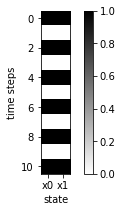

----------------------------------------
'x0 = [1 0]'
array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])


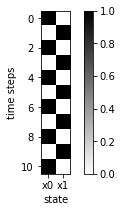

----------------------------------------
'x0 = [0 1]'
array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]])


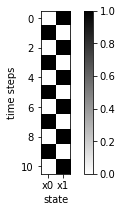

----------------------------------------
'x0 = [0 0]'
array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]])


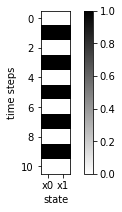

In [20]:
from matplotlib import pylab as plt

def plot_states(states, figsize=(5,3)):
    """Plot the states."""
    Nt, Nx = states.shape
    fig = plt.figure(figsize=figsize)
    plt.imshow(states.astype(np.double), cmap="binary")
    plt.colorbar()
    plt.ylabel("time steps")
    plt.xlabel("state")
    ax = plt.gca()
    ax.set_xticks(range(Nx))
    ax.set_xticklabels(['x{}'.format(k) for k in range(Nx)])
    plt.show()
    
for x0 in ndstate_init:
    states = ndsimulate(x0, f_rules=f_ndinverse2)
    plot_states(states)

### Task 2
<img src="Example2.png" width="200"/>

* Simulate the following more complex boolean network consisting of 5 nodes (reuse the code from task 1)
* The update rules are given by

```
X1 = INVERSE(X4)
X5 = IDENTIY(X4)
X2 = OR(X1, X5)
X3 = OR(X1, X5)
X4 = XOR(X3, X2)
```


* What are the possible trajectories of the boolean network, i.e. which final states (or cycles of states) are reached? (hint: simulate the network for all possible initial states)

***Automatize***
* if you have to do it once, you have to do it 1000 times

In [ ]:
states_init = [
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    ...
]

In [30]:
states_init = np.linspace(0, 31, num=32, dtype=np.uint8)  # (32,)
states_init = np.reshape(states_init, (32,1))
ndstates_init = np.unpackbits(states_init, axis=1)
ndstates_init = ndstates_init[:, 3:]
ndstates_init

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1]], dtype=uint8)

----------------------------------------
'x0 = [0 0 0 0 0]'
array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


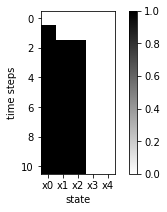

----------------------------------------
'x0 = [0 0 0 0 1]'
array([[0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


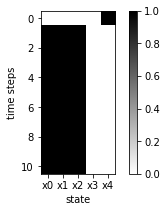

----------------------------------------
'x0 = [0 0 0 1 0]'
array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


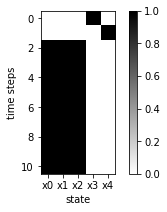

----------------------------------------
'x0 = [0 0 0 1 1]'
array([[0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


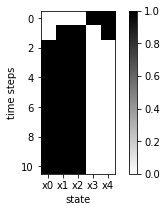

----------------------------------------
'x0 = [0 0 1 0 0]'
array([[0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


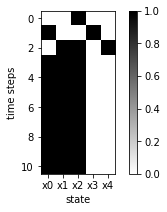

----------------------------------------
'x0 = [0 0 1 0 1]'
array([[0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


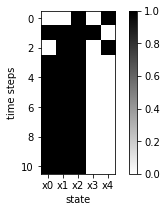

----------------------------------------
'x0 = [0 0 1 1 0]'
array([[0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


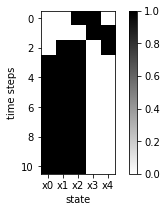

----------------------------------------
'x0 = [0 0 1 1 1]'
array([[0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


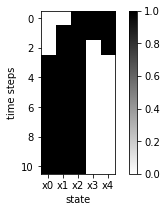

----------------------------------------
'x0 = [0 1 0 0 0]'
array([[0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


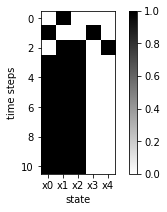

----------------------------------------
'x0 = [0 1 0 0 1]'
array([[0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


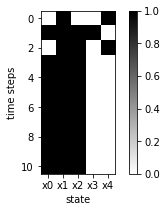

----------------------------------------
'x0 = [0 1 0 1 0]'
array([[0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


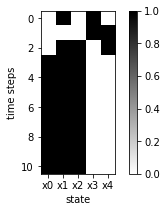

----------------------------------------
'x0 = [0 1 0 1 1]'
array([[0, 1, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


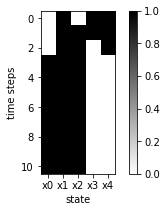

----------------------------------------
'x0 = [0 1 1 0 0]'
array([[0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


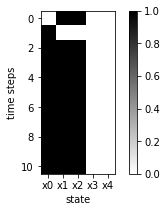

----------------------------------------
'x0 = [0 1 1 0 1]'
array([[0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


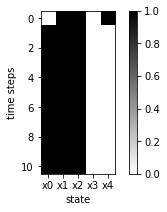

----------------------------------------
'x0 = [0 1 1 1 0]'
array([[0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


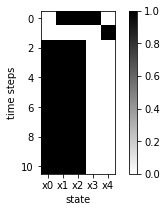

----------------------------------------
'x0 = [0 1 1 1 1]'
array([[0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


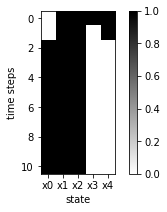

----------------------------------------
'x0 = [1 0 0 0 0]'
array([[1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


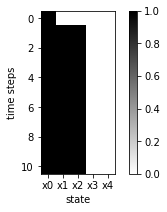

----------------------------------------
'x0 = [1 0 0 0 1]'
array([[1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


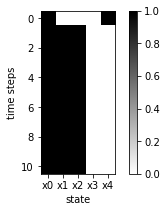

----------------------------------------
'x0 = [1 0 0 1 0]'
array([[1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


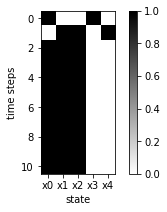

----------------------------------------
'x0 = [1 0 0 1 1]'
array([[1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


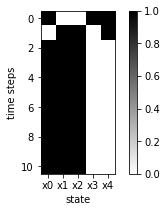

----------------------------------------
'x0 = [1 0 1 0 0]'
array([[1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


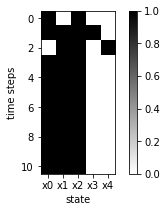

----------------------------------------
'x0 = [1 0 1 0 1]'
array([[1, 0, 1, 0, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


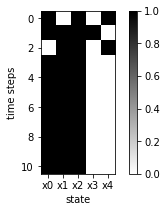

----------------------------------------
'x0 = [1 0 1 1 0]'
array([[1, 0, 1, 1, 0],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


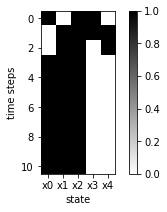

----------------------------------------
'x0 = [1 0 1 1 1]'
array([[1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


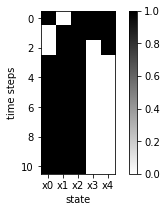

----------------------------------------
'x0 = [1 1 0 0 0]'
array([[1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


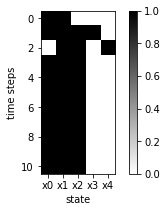

----------------------------------------
'x0 = [1 1 0 0 1]'
array([[1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


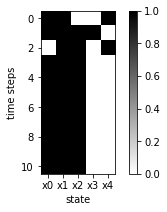

----------------------------------------
'x0 = [1 1 0 1 0]'
array([[1, 1, 0, 1, 0],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


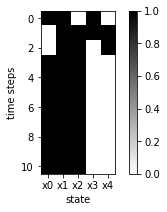

----------------------------------------
'x0 = [1 1 0 1 1]'
array([[1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


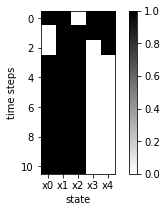

----------------------------------------
'x0 = [1 1 1 0 0]'
array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


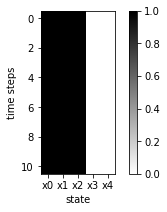

----------------------------------------
'x0 = [1 1 1 0 1]'
array([[1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


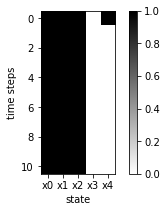

----------------------------------------
'x0 = [1 1 1 1 0]'
array([[1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


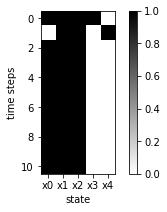

----------------------------------------
'x0 = [1 1 1 1 1]'
array([[1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])


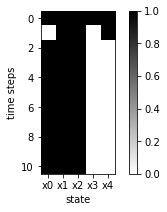

In [31]:
def f_task2(x):
    """
    X0 = INVERSE(X3)
    X4 = IDENTIY(X3)
    X1 = OR(X0, X4)
    X2 = OR(X0, X4)
    X3 = XOR(X2, X1)
    """
    y = np.zeros_like(x)
    y[0] = np.invert(x[3])
    y[4] = x[3]
    y[1] = x[0] or x[4]
    y[2] = x[0] or x[4]
    
    # xor hack
    y[3] = x[2] or x[1]
    if (x[2] and x[1]):
        y[3] = False
    
    return y

def ndsimulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = np.zeros(shape=((steps+1), x0.size), dtype=bool)
    
    print("-" * 40)
    pprint("x0 = {}".format(x0.astype(np.int)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    pprint(states.astype(np.int))
    return states

for x0 in ndstates_init:
    states = ndsimulate(x0, f_rules=f_task2)
    plot_states(states)

***Reuse the solution***

## Cellular automaton

A cellular automaton is a discrete model studied in computer science, mathematics, physics, complexity science, theoretical biology and microstructure modeling. 

<img src="Gospers_glider_gun.gif" width="200"/>

- A cellular automaton consists of a regular grid of cells, each in one of a finite number of states, such as on and off. 
- For each cell, a set of cells called its neighborhood is defined relative to the specified cell. 
- An initial state (time t = 0) is selected by assigning a state for each cell. 
- A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. 
- Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously.

For more information see https://en.wikipedia.org/wiki/Cellular_automaton.

A more in depth introduction with hints how to solve the task is given in https://natureofcode.com/book/chapter-7-cellular-automata/

### Task 3
Build and simulate the simple cellular automaton with the following characteristics:

- **Grid**: We will use the simplest possible grid, which is one-dimensional: a line of cells.
- **States**: The simplest set of states (beyond having only one state) are the two possible states per cell: 0 or 1.
- **Neighborhood**: The simplest neighborhood in one dimension for any given cell would be the cell itself and its two adjacent neighbors: one to the left and one to the right.
- **Rules**: Define how a cell is updated based on its neighborhood. The simplest rules are identical rules for every cell.

For the update rules we need to define an outcome (new state value 0 or 1) for a cell based on its current neighborhood.
The following rules are applied:

```
neighborhood (with cell in the center) -> new state of cell
000 -> 0
001 -> 1
010 -> 0
011 -> 1
100 -> 1
101 -> 0
110 -> 1
111 -> 0
```
- the one dimensional grid contains `101` cells
- the initial state of all cells is 0, with exception of the cell in the middle of the grid which starts with state 1

***Cellular automaton as a special boolean network***

----------------------------------------
('x0 = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 '
 '0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n'
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, .

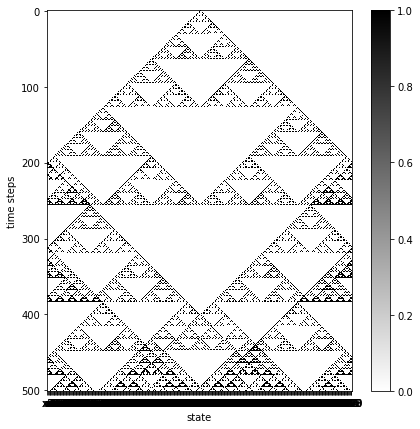

In [40]:
def f_automaton(x):
    """ New state based on neighborhood (cell in center)
    000 -> 0  [0]
    001 -> 1  [1]
    010 -> 0  [2]
    011 -> 1  [3]
    100 -> 1  [4]
    101 -> 0  [5]
    110 -> 1  [6]
    111 -> 0  [7]
    """
    Nx = x.size
    y = np.zeros_like(x)
    for k in range(Nx):
        
        s = np.zeros(shape=(3,))
        # get the neighborhood
        if k==0:
            s[0] = x[-1]
            s[1] = x[0]
            s[2] = x[1]
        elif k==(Nx-1):
            s[0] = x[Nx-2]
            s[1] = x[Nx-1]
            s[2] = x[0]
        else:
            s = x[(k-1):(k+2)]
    
        s = ''.join(s.astype(np.uint8).astype(str))
    
        # update based on neighborhood
        if s == '000':
            y[k] = 0
        elif s == '001':
            y[k] = 1
        elif s == '010':
            y[k] = 0
        elif s == '011':
            y[k] = 1
        elif s == '100':
            y[k] = 1
        elif s == '101':
            y[k] = 0
        elif s == '110':
            y[k] = 1
        elif s == '111':
            y[k] = 0
    return y

# initial condition
Nx = 401
x0 = np.zeros(Nx, dtype=bool)
x0[int((Nx-1)/2 + 1)] = 1

states = ndsimulate(x0, f_rules=f_automaton, steps=500)
plot_states(states, figsize=(7,7))

In [37]:
# Create animation
Nt, Nx = states.shape
filenames = []
for k in range(Nt):
    filename = "./results/automaton_{:04}.png".format(k)
    # print(filename)
    
    fig = plt.figure(figsize=(10,4))
    data = states[k,:].astype(np.double)
    data = data.reshape((1, Nx))
    
    plt.imshow(data, cmap="binary")
    plt.title("time: {}".format(k))
    # plt.ylabel("time: {}".format(k))
    # plt.xlabel("state")
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    fig.savefig(filename, bbox_inches="tight")
    plt.close()
    filenames.append(filename)

import imageio

def create_gif(output_file, filenames, duration):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave(output_file, images, duration=duration)

create_gif('automaton.gif', filenames, duration=0.2)

<img src="automaton.gif" width="1000"/>